In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from time import sleep
from matplotlib.animation import FuncAnimation
from math import sin, cos, atan2, sqrt, pi

In [2]:
def wrap_to_pi(theta):
    return (theta + pi) % (2 * pi) - pi

In [3]:
class Robot(object):
    '''A differential drive robot living in the x, y, theta plane'''
    
    def __init__(self, init_pose=np.zeros(3)):
        self.pose = init_pose 
   
    def update_pose(self, v, w, dt=0.1):
        dx = dt * v * cos(self.pose[2])
        dy = dt * v * sin(self.pose[2])
        dtheta = dt * w
        self.pose += np.array([dx, dy, dtheta])

In [4]:
class RobotControl(object):
    k_alpha = 1.2
    k_beta = -0.4
    k_rho = 0.4
    
    def __init__(self, goal_pose):
        self.goal_pose = goal_pose
    
    def control_law(self, measured_pose):
        e = self.goal_pose - measured_pose
        dx, dy = e[0], e[1]
        theta = wrap_to_pi(measured_pose[2])

        rho = sqrt(dx**2 + dy**2)
        alpha = wrap_to_pi(-theta + atan2(dy, dx))
        beta = wrap_to_pi(-theta - alpha)

        v = self.k_rho * rho
        w = self.k_alpha * alpha + self.k_beta * beta
        
        if alpha < -pi / 2 or alpha > pi / 2:
            v, w = -v, -w
        
        return v, w

In [5]:
def get_limits(init_pose, goal_pose):
    x_min = min(init_pose[0], goal_pose[0]) - 1
    x_max = max(init_pose[0], goal_pose[0]) + 1

    y_min = min(init_pose[1], goal_pose[1]) - 1
    y_max = max(init_pose[1], goal_pose[1]) + 1
    return [x_min, x_max, y_min, y_max]

<IPython.core.display.Javascript object>


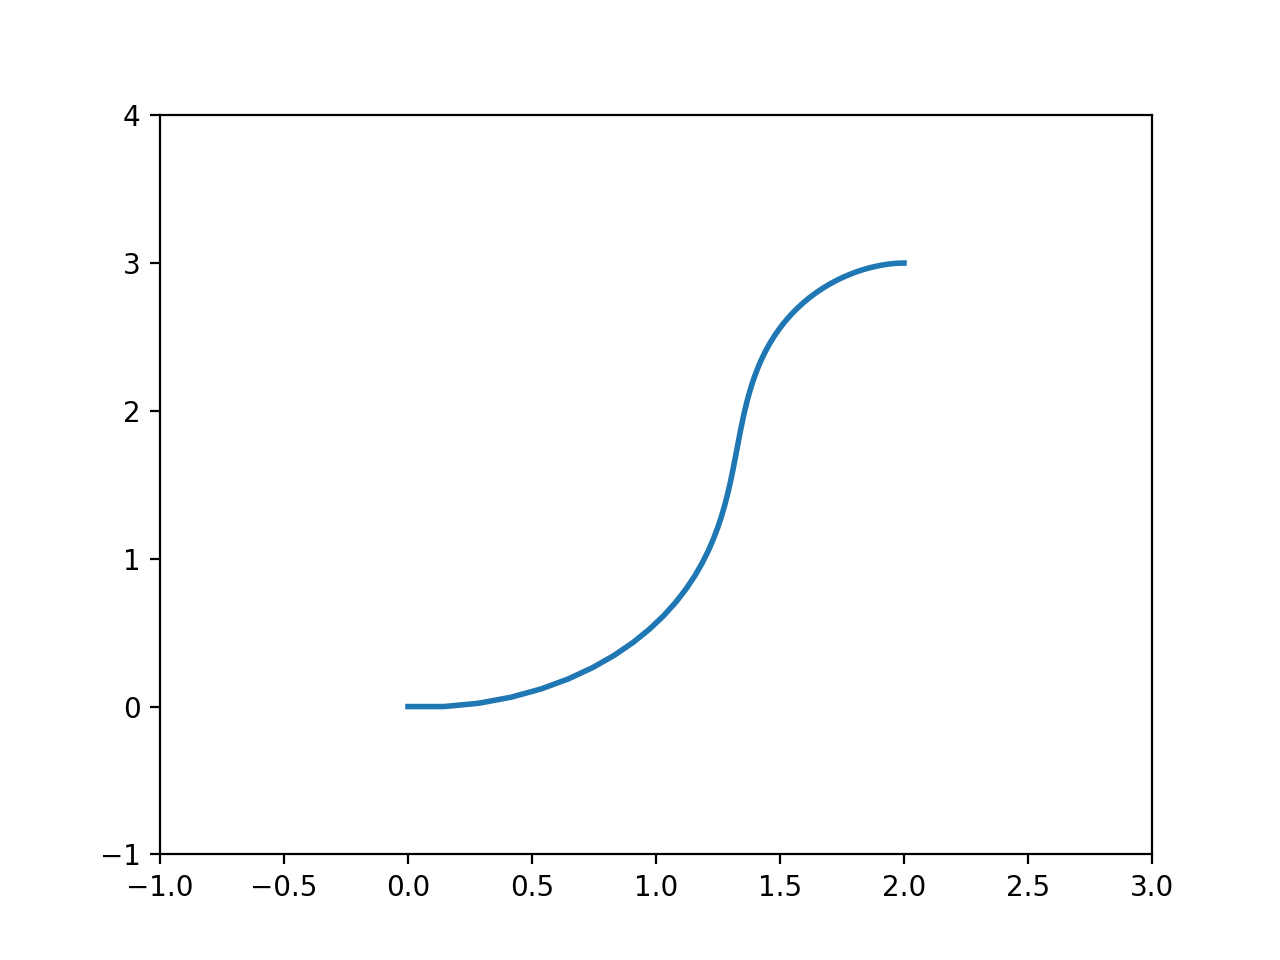

In [6]:
init_pose = np.array(np.zeros(3))
goal_pose = np.array([2, 3, 0])

robot = Robot(init_pose=init_pose)
controller = RobotControl(goal_pose=goal_pose)

f, ax = plt.subplots()
robot_plot, = ax.plot([], [], lw=2)
xdata, ydata = [], []
limits = get_limits(init_pose, goal_pose)

def init():
    robot_plot.set_data([], [])
    ax.set_xlim(limits[:2])
    ax.set_ylim(limits[2:])
    return robot_plot,

def advance(i):
    global xdata, ydata
    measured_pose = robot.pose
    xdata += [measured_pose[0]]
    ydata += [measured_pose[1]]
    v, w = controller.control_law(measured_pose)
    robot.update_pose(v, w)
    robot_plot.set_data(xdata, ydata)
    return robot_plot,

ani = FuncAnimation(f, advance, init_func=init, frames=500, interval=10, blit=True)
plt.show()